# Implementation of Linear, Ridge, Lasso and Elastic Net Regression

This dataset has been cleaned previously during the EDA phase

#### Additional Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
<br>
122 instances for each region. 
<br>
The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into "fire" (138 classes) and "not fire" (106 classes) classes.

#### Attribute Information:
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classfire and not_fire€œnot Fireâ€

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LassoCV,RidgeCV,ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('/mnt/c/Users/ANOOP/Desktop/Python/datasets/Algerian_forest_fires_cleaned.csv')

In [3]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia


#### Problem statement : Use the above data to predict the FWI

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(10), int64(3), object(2)
memory usage: 28.6+ KB


In [5]:
df_mod = df.copy()

#### One-Hot Encoding the categorical variables

In [6]:
encoder = OneHotEncoder()

In [7]:
numerical_col = set(df_mod._get_numeric_data())
all_col = set(df_mod.columns)
categorical_col = set(all_col - numerical_col)
print(f"All:\n{all_col}\nNumeric:\n{numerical_col}\nCategorical:\n{categorical_col}")

All:
{'Rain', 'DMC', 'day', 'month', 'FFMC', 'ISI', 'Classes', 'DC', 'Region', 'RH', 'Ws', 'FWI', 'BUI', 'Temperature', 'year'}
Numeric:
{'Rain', 'DMC', 'day', 'month', 'FFMC', 'ISI', 'DC', 'RH', 'Ws', 'FWI', 'BUI', 'Temperature', 'year'}
Categorical:
{'Classes', 'Region'}


In [8]:
encoder.fit(df_mod[list(categorical_col)])

OneHotEncoder()

In [9]:
df_mod[encoder.get_feature_names_out()] = encoder.transform(df_mod[list(categorical_col)]).toarray()

In [10]:
df_mod.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_fire,Classes_not fire,Region_Bejaia,Region_Sidi-Bel Abbes
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,0.0,1.0,1.0,0.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,0.0,1.0,1.0,0.0


In [11]:
# As we have converted the categorical featucres to numeric one-hot encoding we can drop them
droplist = list(categorical_col)
droplist

['Classes', 'Region']

In [12]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    243 non-null    int64  
 1   month                  243 non-null    int64  
 2   year                   243 non-null    int64  
 3   Temperature            243 non-null    float64
 4   RH                     243 non-null    float64
 5   Ws                     243 non-null    float64
 6   Rain                   243 non-null    float64
 7   FFMC                   243 non-null    float64
 8   DMC                    243 non-null    float64
 9   DC                     243 non-null    float64
 10  ISI                    243 non-null    float64
 11  BUI                    243 non-null    float64
 12  FWI                    243 non-null    float64
 13  Classes                243 non-null    object 
 14  Region                 243 non-null    object 
 15  Classe

In [13]:
# We can drop day and year as it is not significant to temerature prediction
# The month feature is retained as there could be relevant to seasonal temperature
droplist.extend(['day', 'year'])
droplist

['Classes', 'Region', 'day', 'year']

In [14]:
df_mod = df_mod.drop(droplist,axis=1)

<Axes: >

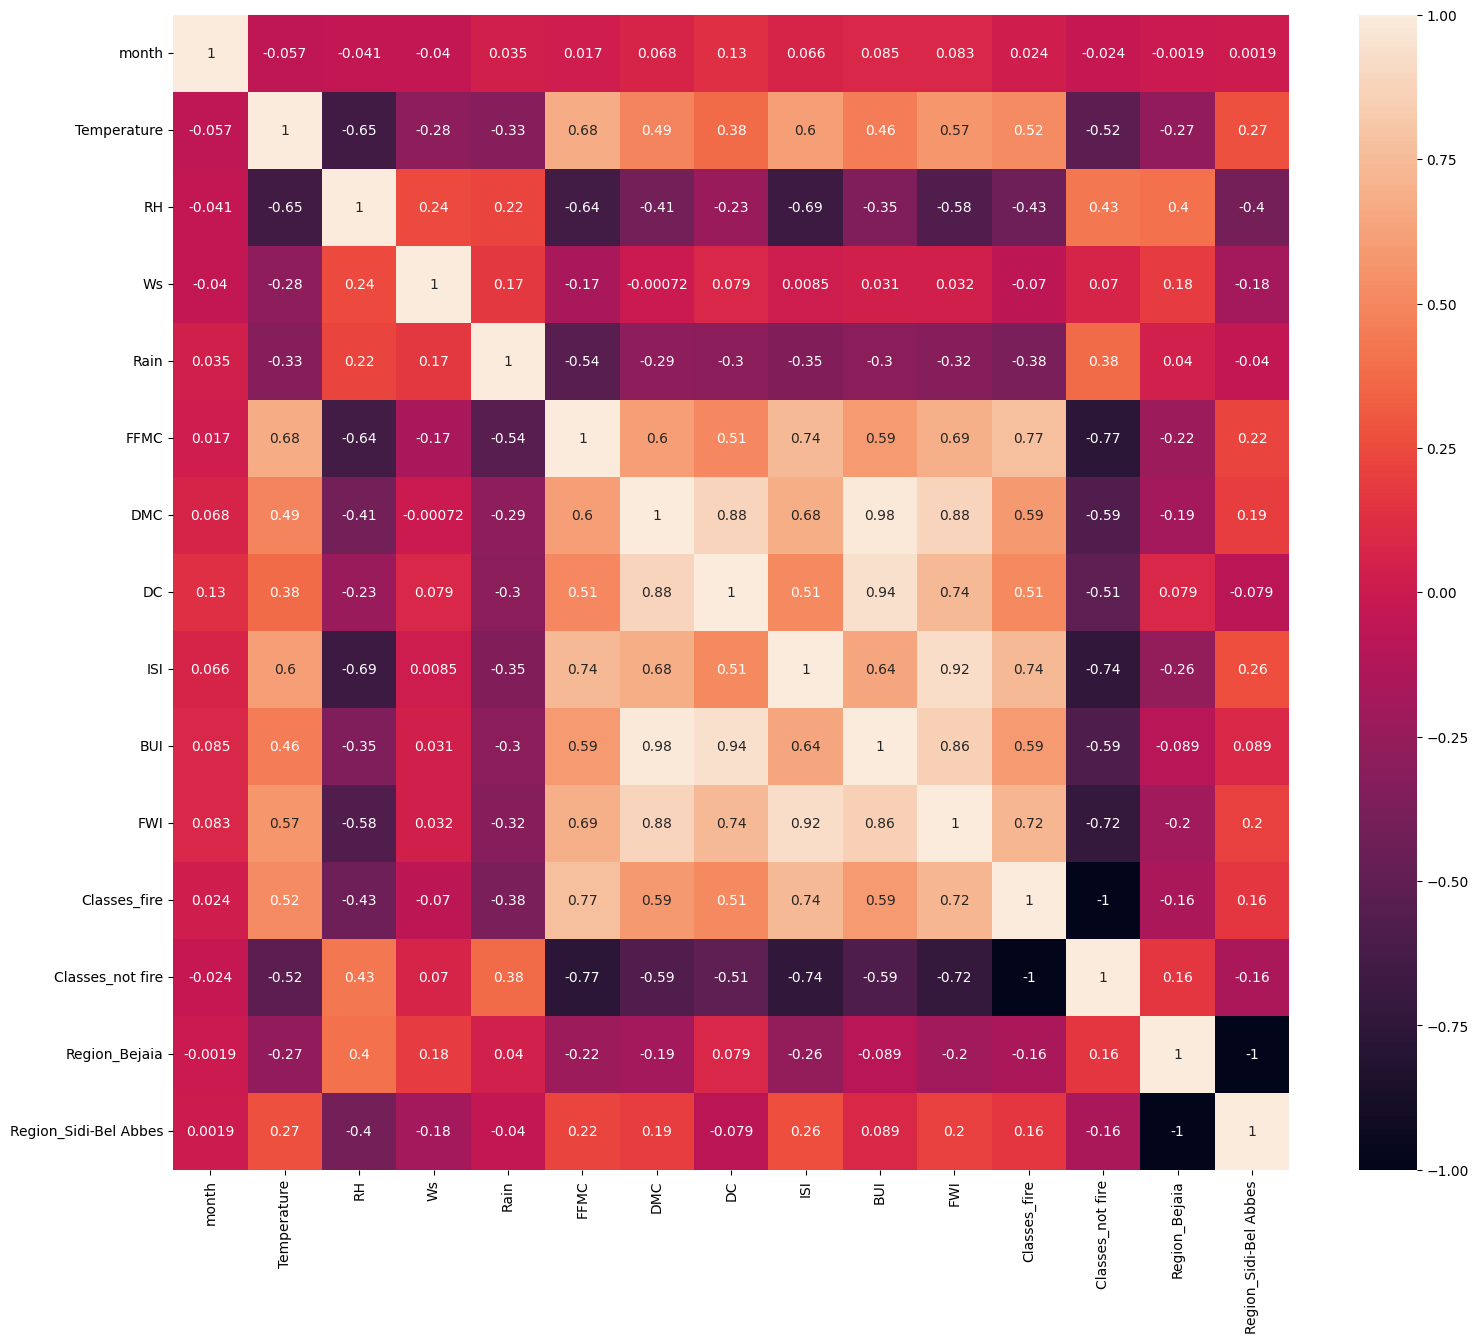

In [15]:
# Check correlation of the features
plt.figure(figsize=(18,15))
sns.heatmap(df_mod.corr(),annot=True)

In [16]:
df_mod = df_mod.drop('month',axis=1)
droplist.append('month')

In [17]:
corr_df = df_mod.corr()


In [18]:
df_mod.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_fire,Classes_not fire,Region_Bejaia,Region_Sidi-Bel Abbes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.516015,-0.269555,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.432161,0.402682,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.069964,0.181160,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.379097,0.040013,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.769492,-0.222241,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.585658,-0.192089,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.511123,0.078734,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.735197,-0.263197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,-0.586639,-0.089408,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,-0.719216,-0.197102,0.197102


In [19]:
def correlation(cor_mat,threshold):
    related_col = {}
    corr_threshold = cor_mat[abs(cor_mat)> threshold]
    for col in corr_threshold.columns:
        #print(f'Col:{col}\n')
        list_rel = {}
        for index,value in enumerate(corr_threshold[col]):
            if value > 0 and value != 1:
                #print(f'row:{index},value:{value}\n')
                name = corr_threshold.index[index]
                list_rel[name] = value
        if len(list_rel) != 0:
            related_col[col] = list_rel
    return related_col

In [20]:
rel_feat = correlation(corr_df,0.85)

In [21]:
for col,list in rel_feat.items():
    print(col)
    print(list)

DMC
{'DC': 0.8759246606759622, 'BUI': 0.9822484890812936, 'FWI': 0.8758641588191531}
DC
{'DMC': 0.8759246606759622, 'BUI': 0.9419884631009655}
ISI
{'FWI': 0.9228949343157855}
BUI
{'DMC': 0.9822484890812936, 'DC': 0.9419884631009655, 'FWI': 0.8579730958964258}
FWI
{'DMC': 0.8758641588191531, 'ISI': 0.9228949343157855, 'BUI': 0.8579730958964258}


In [22]:
target_corr = corr_df['FWI'].sort_values(ascending=False)

In [23]:
target_corr

FWI                      1.000000
ISI                      0.922895
DMC                      0.875864
BUI                      0.857973
DC                       0.739521
Classes_fire             0.719216
FFMC                     0.691132
Temperature              0.566670
Region_Sidi-Bel Abbes    0.197102
Ws                       0.032368
Region_Bejaia           -0.197102
Rain                    -0.324422
RH                      -0.580957
Classes_not fire        -0.719216
Name: FWI, dtype: float64

## For the highly correlated features (DMC', 'ISI', 'BUI','FWI','DC') We can see that target feature FWI is highly correlated to ISI,DMC the most so we can drop ('BUI','DC')

In [24]:
highly_corr_features = ['BUI','DC']
droplist.extend(highly_corr_features)

In [25]:
df_mod = df_mod.drop(highly_corr_features,axis=1)

In [26]:
df_mod.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes_fire,Classes_not fire,Region_Bejaia,Region_Sidi-Bel Abbes
0,29.0,57.0,18.0,0.0,65.7,3.4,1.3,0.5,0.0,1.0,1.0,0.0
1,29.0,61.0,13.0,1.3,64.4,4.1,1.0,0.4,0.0,1.0,1.0,0.0


### Splitting of Data

In [27]:
independent_features = ['Temperature','RH','Ws','Rain','FFMC','DMC','ISI','Region_Bejaia','Region_Sidi-Bel Abbes','Classes_fire','Classes_not fire']
dependent_features = ['FWI']

In [28]:
X = df_mod[independent_features]
y = df_mod[dependent_features]

In [29]:
X.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region_Bejaia,Region_Sidi-Bel Abbes,Classes_fire,Classes_not fire
0,29.0,57.0,18.0,0.0,65.7,3.4,1.3,1.0,0.0,0.0,1.0
1,29.0,61.0,13.0,1.3,64.4,4.1,1.0,1.0,0.0,0.0,1.0


In [30]:
X.shape

(243, 11)

In [31]:
y.head(2)

,FWI
0,0.5
1,0.4


In [32]:
y.shape

(243, 1)

#### Train, Test Split the data

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [34]:
print(f'Train X:{X_train.shape}\nTrain y:{y_train.shape}\nTest X:{X_test.shape}\nTest y:{y_test.shape}')

Train X:(194, 11)
Train y:(194, 1)
Test X:(49, 11)
Test y:(49, 1)


In [40]:
X_test.iloc[43]

Temperature              29.0
RH                       87.0
Ws                       18.0
Rain                      0.0
FFMC                     80.0
DMC                      11.8
ISI                       2.8
Region_Bejaia             0.0
Region_Sidi-Bel Abbes     1.0
Classes_fire              0.0
Classes_not fire          1.0
Name: 177, dtype: float64

In [41]:
y_test.iloc[43]

FWI    3.2
Name: 177, dtype: float64

### Scaling of data

<Axes: title={'center': 'Independent Features Before Scaling'}>

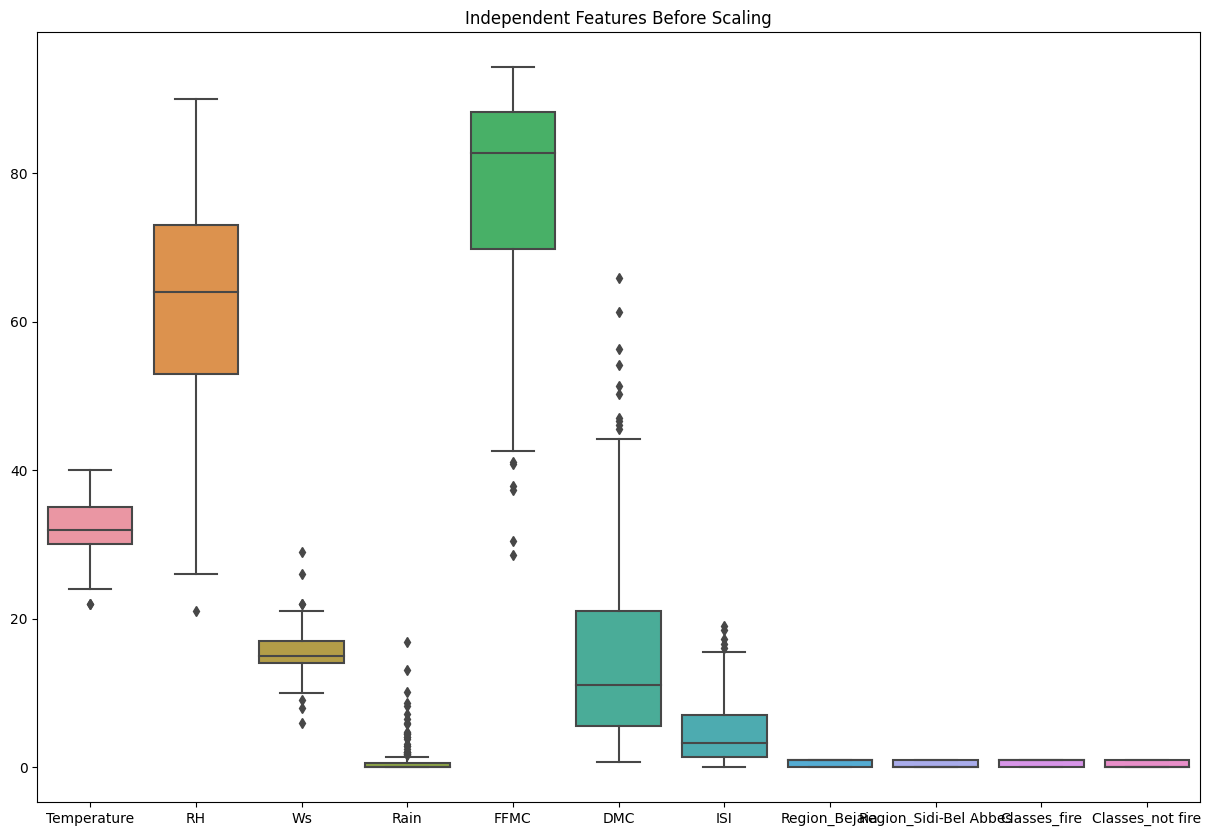

In [35]:
# Box plot of data before scaling 
plt.figure(figsize=(15,10))
plt.title('Independent Features Before Scaling')
sns.boxplot(X_train)

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = pd.DataFrame()

In [38]:
X_train_scaled[scaler.get_feature_names_out()] = scaler.fit_transform(X_train)

In [39]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            194 non-null    float64
 1   RH                     194 non-null    float64
 2   Ws                     194 non-null    float64
 3   Rain                   194 non-null    float64
 4   FFMC                   194 non-null    float64
 5   DMC                    194 non-null    float64
 6   ISI                    194 non-null    float64
 7   Region_Bejaia          194 non-null    float64
 8   Region_Sidi-Bel Abbes  194 non-null    float64
 9   Classes_fire           194 non-null    float64
 10  Classes_not fire       194 non-null    float64
dtypes: float64(11)
memory usage: 16.8 KB


In [40]:
X_train_scaled.shape

(194, 11)

In [41]:
X_test_scaled = pd.DataFrame()
X_test_scaled[scaler.get_feature_names_out()] = scaler.transform(X_test)

In [42]:
X_test_scaled.shape

(49, 11)

In [43]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            49 non-null     float64
 1   RH                     49 non-null     float64
 2   Ws                     49 non-null     float64
 3   Rain                   49 non-null     float64
 4   FFMC                   49 non-null     float64
 5   DMC                    49 non-null     float64
 6   ISI                    49 non-null     float64
 7   Region_Bejaia          49 non-null     float64
 8   Region_Sidi-Bel Abbes  49 non-null     float64
 9   Classes_fire           49 non-null     float64
 10  Classes_not fire       49 non-null     float64
dtypes: float64(11)
memory usage: 4.3 KB


<Axes: title={'center': 'Independent Features After Scaling'}>

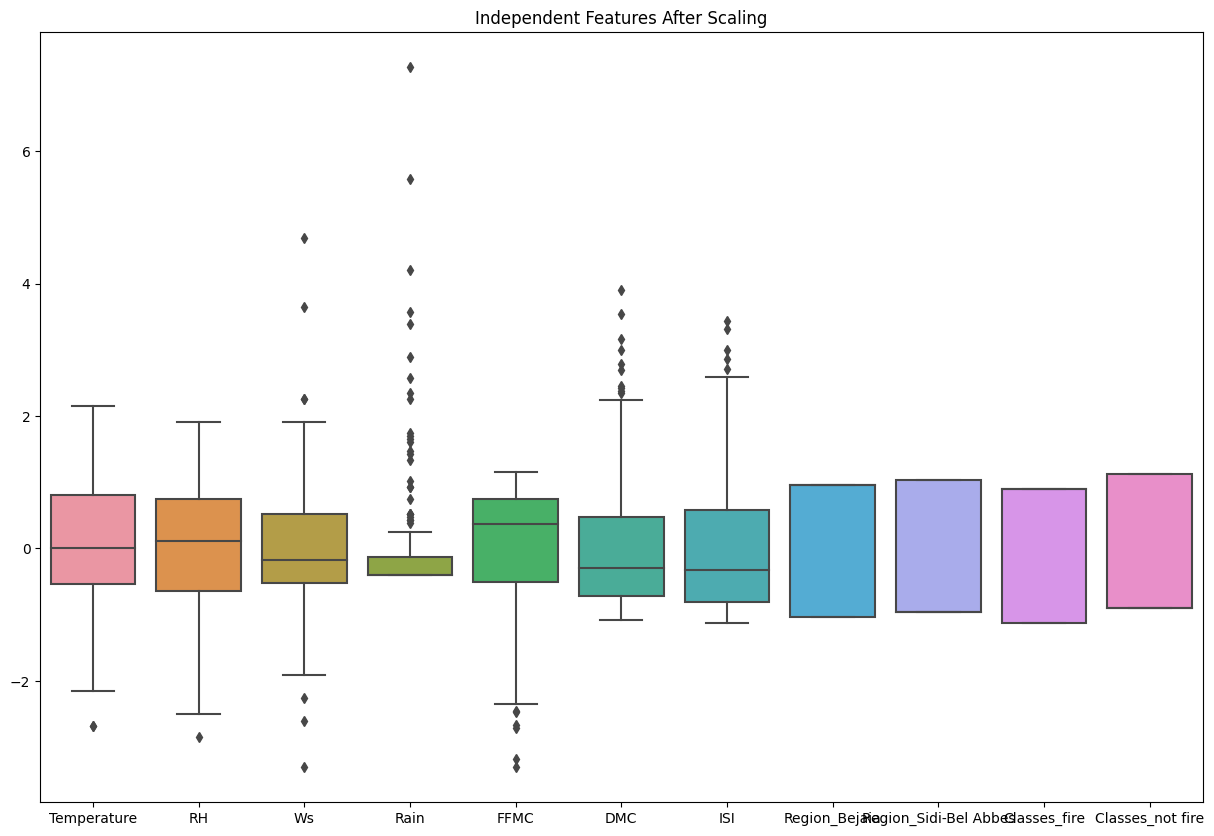

In [44]:
# Box plot of data after scaling 
plt.figure(figsize=(15,10))
plt.title('Independent Features After Scaling')
sns.boxplot(X_train_scaled)

## Linear Regression Model

In [45]:
linear_regressor = LinearRegression()

In [46]:
linear_regressor.fit(X_train_scaled,y_train)
y_pred_linear = linear_regressor.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test,y_pred_linear)
mae_lr = mean_absolute_error(y_test,y_pred_linear)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,y_pred_linear)
score_lr = linear_regressor.score
r2_adj_lr = 1 - ( (1-r2_lr)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

In [47]:
y_pred_linear

array([[-2.98376346e-01],
       [ 4.59446951e-03],
       [ 8.38716351e+00],
       [ 5.93185113e-01],
       [ 3.15431180e-01],
       [ 1.05055619e+01],
       [ 8.51237853e-01],
       [ 1.31706990e+01],
       [ 2.18736728e+00],
       [ 3.61713407e+00],
       [ 2.09307448e+01],
       [ 2.08370102e-01],
       [ 5.55734075e-01],
       [ 8.46060347e-01],
       [ 2.87888444e-01],
       [ 5.23378473e+00],
       [ 1.03844712e+01],
       [ 1.44568654e+01],
       [ 6.03477930e+00],
       [ 7.82484923e+00],
       [ 9.75474652e+00],
       [ 2.28791268e+01],
       [ 9.84640761e+00],
       [ 6.55630635e+00],
       [-5.37002119e-01],
       [ 4.42323618e+00],
       [ 1.41207028e-01],
       [ 2.15344054e+00],
       [ 1.49657789e+01],
       [ 1.43109776e+01],
       [ 1.12422921e+01],
       [ 1.93452415e+01],
       [ 4.52072581e+00],
       [ 1.42484626e+01],
       [ 7.72153647e+00],
       [ 4.18283002e+00],
       [ 2.07799973e-01],
       [ 1.18645078e+01],
       [ 1.2

In [48]:
y_test

,FWI
152,0.5
15,0.0
112,8.3
144,0.8
125,1.0
225,10.3
63,0.8
77,14.6
220,2.7
224,3.9


In [49]:
print(f'Linear Model:\nmse->{mse_lr}\nmae->{mae_lr}\nrmse->{rmse_lr}\nR2->{r2_lr}\nR2-adj->{r2_adj_lr}\nscore->{score_lr}')

Linear Model:
mse->0.6833274680027909
mae->0.590877996296719
rmse->0.8266362368072131
R2->0.9847830197069042
R2-adj->0.9837741591349862
score-><bound method RegressorMixin.score of LinearRegression()>


In [50]:
scores = {"MODEL":["Linear Regression"],"MSE":[mse_lr],"MAE":[mae_lr],"RMSE":rmse_lr,"R2":[r2_lr],'R2_ADJ':[r2_adj_lr]}

In [51]:
evaluation_df = pd.DataFrame(scores)

In [52]:
evaluation_df.head()

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774


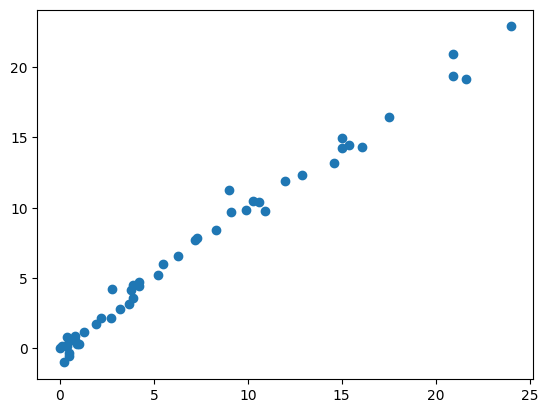

In [53]:
plt.scatter(y_test,y_pred_linear)

## Lasso Regression Model

In [54]:
lasso_regessor = Lasso()
lasso_regessor.fit(X_train_scaled,y_train)
y_pred_lasso = lasso_regessor.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
score_lasso = linear_regressor.score
r2_adj_lasso = 1 - ( (1-r2_lasso)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

In [55]:
print(f'Lasso Model:\nmse->{mse_lasso}\nmae->{mae_lasso}\nrmse->{rmse_lasso}\nR2->{r2_lasso}\nR2-adj->{r2_adj_lasso}\nscore->{score_lasso}')

Lasso Model:
mse->2.457146582550496
mae->1.2440295624853215
rmse->1.567528813945854
R2->0.9452819433218423
R2-adj->0.9416542268569921
score-><bound method RegressorMixin.score of LinearRegression()>


In [56]:
evaluation_df.loc[len(evaluation_df.index)] = ["Lasso Model",mse_lasso,mae_lasso,rmse_lasso,r2_lasso,r2_adj_lasso]

In [57]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654


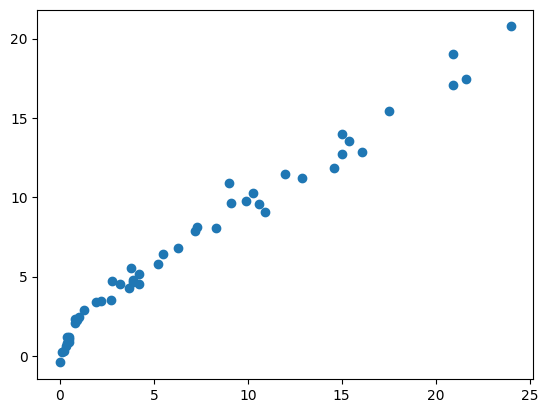

In [58]:
plt.scatter(y_test,y_pred_lasso)

In [60]:
evaluation_df.loc[1]

MODEL     Lasso Model
MSE          2.457147
MAE           1.24403
RMSE         1.567529
R2           0.945282
R2_ADJ       0.941654
Name: 1, dtype: object

In [61]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654


##### From the above metrics for lasso we can see that the all metrics are worse when compared to that of Linear regression, which means that the Lasso predictions shows a deviation higher than the linear regression. Overall Lasso score is not better than that of Linear regression.

In [65]:
# By default alpha (Hyperparameter a.k.a lambda) is set to 1 and not optimized
lasso_regessor.alpha

1.0

In [66]:
lasso_regessor.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        3.12645633,  3.81190831,  0.        , -0.        ,  0.        ,
       -0.        ])

In [67]:
linear_regressor.coef_

array([[ 0.01583918, -0.13156567,  0.07939903, -0.04716001, -0.91352368,
         3.82192002,  4.63505857,  0.18678201, -0.18678201,  0.24446228,
        -0.24446228]])

## Lasso Regression Model With Cross-Validation (Let's tune the Lambda hyperparameter)

In [93]:
lasso_regessor_cv = LassoCV(cv=5,random_state=24)
lasso_regessor_cv.fit(X_train_scaled,np.ravel(y_train)) # Ravel used to flatten as CV regressors expect vector for y_train
y_pred_lasso_cv = lasso_regessor_cv.predict(X_test_scaled)
mse_lasso_cv = mean_squared_error(y_test,y_pred_lasso_cv)
mae_lasso_cv = mean_absolute_error(y_test,y_pred_lasso_cv)
rmse_lasso_cv = np.sqrt(mse_lasso_cv)
r2_lasso_cv = r2_score(y_test,y_pred_lasso_cv)
r2_adj_lasso_cv = 1 - ( (1-r2_lasso_cv)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

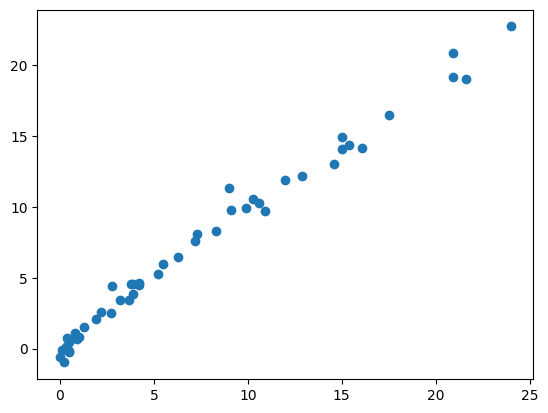

In [113]:
plt.scatter(y_test,y_pred_lasso_cv)

In [94]:
evaluation_df.loc[len(evaluation_df.index)] = ["LassoCV Model",mse_lasso_cv,mae_lasso_cv,rmse_lasso_cv,r2_lasso_cv,r2_adj_lasso_cv]

In [97]:
evaluation_df 

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654
2,LassoCV Model,0.760746,0.612742,0.872208,0.983059,0.981936


##### From the above metrics we see that the costfunctions MSE,MAR,RMSE have improved in LassoCV compared to Lasso but are still not as good as Linear regression. So we will see slightly more deviations in the predictions of LassoCV when compared to Linear regressor but still better than Lasso regressor. 

In [87]:
# Hyperparameter value after tuning
lasso_regessor_cv.alpha_

0.05255048566702248

In [88]:
# Hyperparameter values that were tested in CV
lasso_regessor_cv.alphas_

array([6.94686494, 6.47866949, 6.04202885, 5.63481633, 5.25504857,
       4.90087588, 4.57057325, 4.26253191, 3.97525153, 3.70733288,
       3.45747105, 3.22444907, 3.007132  , 2.80446136, 2.61545005,
       2.43917747, 2.27478508, 2.12147218, 1.97849205, 1.84514831,
       1.72079149, 1.6048159 , 1.49665668, 1.39578703, 1.30171566,
       1.21398438, 1.13216589, 1.0558617 , 0.98470016, 0.91833466,
       0.85644198, 0.79872066, 0.74488956, 0.69468649, 0.64786695,
       0.60420289, 0.56348163, 0.52550486, 0.49008759, 0.45705732,
       0.42625319, 0.39752515, 0.37073329, 0.3457471 , 0.32244491,
       0.3007132 , 0.28044614, 0.26154501, 0.24391775, 0.22747851,
       0.21214722, 0.19784921, 0.18451483, 0.17207915, 0.16048159,
       0.14966567, 0.1395787 , 0.13017157, 0.12139844, 0.11321659,
       0.10558617, 0.09847002, 0.09183347, 0.0856442 , 0.07987207,
       0.07448896, 0.06946865, 0.06478669, 0.06042029, 0.05634816,
       0.05255049, 0.04900876, 0.04570573, 0.04262532, 0.03975

In [89]:
# Compare coeff of Lasso and LassoCV
lasso_regessor_cv.coef_

array([-0.00000000e+00,  0.00000000e+00,  5.49259340e-02,  0.00000000e+00,
       -5.09210036e-01,  3.74280672e+00,  4.59296602e+00,  2.82117251e-01,
       -1.41009770e-15,  2.67978705e-01, -0.00000000e+00])

In [90]:
lasso_regessor.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        3.12645633,  3.81190831,  0.        , -0.        ,  0.        ,
       -0.        ])

##### We see that coefficients that were set to 0 by lasso regressor were changed to some value closer to zero in Lasso CV regressor 

## Ridge Regression Model

In [99]:
ridge_regessor = Ridge(random_state=24)
ridge_regessor.fit(X_train_scaled,y_train) 
y_pred_ridge = ridge_regessor.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
r2_adj_ridge = 1 - ( (1-r2_ridge)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

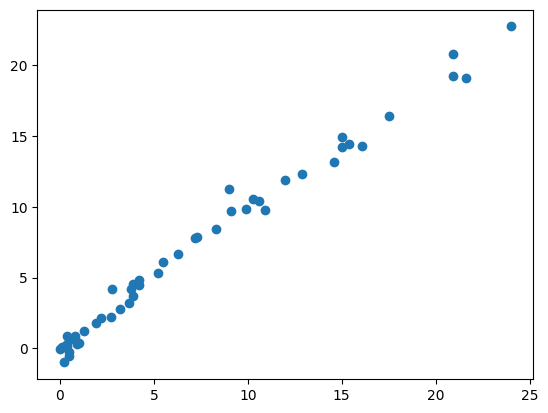

In [112]:
plt.scatter(y_test,y_pred_ridge)

In [105]:
evaluation_df.loc[len(evaluation_df.index)] = ["Ridge Model",mse_ridge,mae_ridge,rmse_ridge,r2_ridge,r2_adj_ridge]

In [107]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654
2,LassoCV Model,0.760746,0.612742,0.872208,0.983059,0.981936
3,Ridge Model,0.712705,0.607054,0.844219,0.984129,0.983077


In [110]:
ridge_regessor.alpha

1.0

In [108]:
ridge_regessor.coef_

array([[ 0.02055092, -0.15759253,  0.09813111, -0.04545688, -0.87919215,
         3.80715035,  4.55244892,  0.18350614, -0.18350614,  0.25891682,
        -0.25891682]])

In [109]:
linear_regressor.coef_

array([[ 0.01583918, -0.13156567,  0.07939903, -0.04716001, -0.91352368,
         3.82192002,  4.63505857,  0.18678201, -0.18678201,  0.24446228,
        -0.24446228]])

##### From the above metrics we see that the Ridge is performing as good as linear regressor and better than Lasso and LassoCV. Here we have a fixed Hyperparameter alpha (Lambda) which is not optimized.

## Ridge Regression Model With Cross-Validation (Let's tune the Lambda hyperparameter)

In [115]:
ridge_regessor_cv = RidgeCV(cv=5)
ridge_regessor_cv.fit(X_train_scaled,np.ravel(y_train)) 
y_pred_ridge_cv = ridge_regessor_cv.predict(X_test_scaled)
mse_ridge_cv = mean_squared_error(y_test,y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test,y_pred_ridge_cv)
rmse_ridge_cv = np.sqrt(mse_ridge_cv)
r2_ridge_cv = r2_score(y_test,y_pred_ridge_cv)
r2_adj_ridge_cv = 1 - ( (1-r2_ridge_cv)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

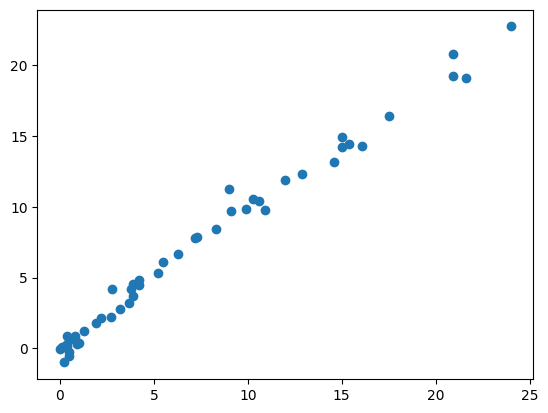

In [116]:
plt.scatter(y_test,y_pred_ridge_cv)

In [117]:
evaluation_df.loc[len(evaluation_df.index)] = ["RidgeCV Model",mse_ridge_cv,mae_ridge_cv,rmse_ridge_cv,r2_ridge_cv,r2_adj_ridge_cv]

In [118]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654
2,LassoCV Model,0.760746,0.612742,0.872208,0.983059,0.981936
3,Ridge Model,0.712705,0.607054,0.844219,0.984129,0.983077
4,RidgeCV Model,0.712705,0.607054,0.844219,0.984129,0.983077


In [120]:
ridge_regessor_cv.alpha_

1.0

In [121]:
ridge_regessor_cv.alphas

(0.1, 1.0, 10.0)

##### The alpha of RidgeCV and Ride are 1 hence we end up with same scores

In [128]:
#Lets try it again with better set of alphas to choose from
custom_alphas = np.linspace(0.1,5,100)

In [139]:
ridge_regessor_cv = RidgeCV(cv=5,alphas=custom_alphas)
ridge_regessor_cv.fit(X_train_scaled,np.ravel(y_train)) 
y_pred_ridge_cv = ridge_regessor_cv.predict(X_test_scaled)
mse_ridge_cv2 = mean_squared_error(y_test,y_pred_ridge_cv)
mae_ridge_cv2 = mean_absolute_error(y_test,y_pred_ridge_cv)
rmse_ridge_cv2 = np.sqrt(mse_ridge_cv2)
r2_ridge_cv2 = r2_score(y_test,y_pred_ridge_cv)
r2_adj_ridge_cv2 = 1 - ( (1-r2_ridge_cv)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

In [140]:
ridge_regessor_cv.alpha_

3.663636363636364

In [141]:
ridge_regessor_cv.alphas

array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.38686869, 1.43636364, 1.48585859, 1.53535354,
       1.58484848, 1.63434343, 1.68383838, 1.73333333, 1.78282828,
       1.83232323, 1.88181818, 1.93131313, 1.98080808, 2.03030303,
       2.07979798, 2.12929293, 2.17878788, 2.22828283, 2.27777778,
       2.32727273, 2.37676768, 2.42626263, 2.47575758, 2.52525253,
       2.57474747, 2.62424242, 2.67373737, 2.72323232, 2.77272727,
       2.82222222, 2.87171717, 2.92121212, 2.97070707, 3.02020202,
       3.06969697, 3.11919192, 3.16868687, 3.21818182, 3.26767677,
       3.31717172, 3.36666667, 3.41616162, 3.46565657, 3.51515152,
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262

In [146]:
evaluation_df.loc[len(evaluation_df.index)] = ["RidgeCV Model with custom alpha set",mse_ridge_cv2,mae_ridge_cv2,rmse_ridge_cv2,r2_ridge_cv2,r2_adj_ridge_cv2]

In [147]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654
2,LassoCV Model,0.760746,0.612742,0.872208,0.983059,0.981936
3,Ridge Model,0.712705,0.607054,0.844219,0.984129,0.983077
4,RidgeCV Model,0.712705,0.607054,0.844219,0.984129,0.983077
5,RidgeCV Model with custom alpha set,0.802879,0.654481,0.896035,0.982121,0.980935


##### From the above metrics we see that the RidgeCV is performing a alightly worse than Ridge regressor this could be because it is generalizing more to avoid overfitting of the model

## Elastic Net Regression

In [162]:
elastic_regressor = ElasticNet()
elastic_regressor.fit(X_train_scaled,y_train) 
y_pred_elastic = elastic_regessor.predict(X_test_scaled)
mse_elastic = mean_squared_error(y_test,y_pred_elastic)
mae_elastic = mean_absolute_error(y_test,y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test,y_pred_elastic)
r2_adj_elastic = 1 - ( (1-r2_ridge_elastic)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

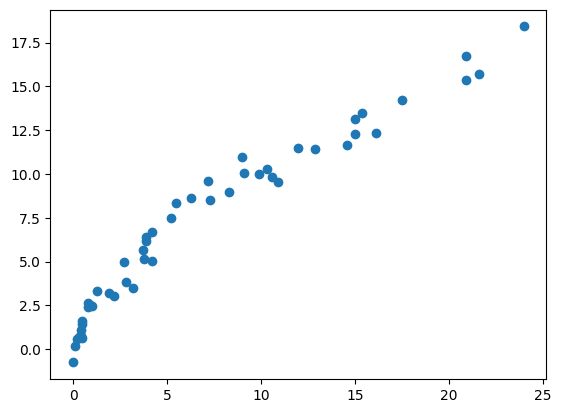

In [163]:
plt.scatter(y_test,y_pred_elastic)

##### From the plot between preditions and actuals it seems the relation may not be linear as there is a slight curve forming

In [169]:
elastic_regressor.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [165]:
elastic_regressor.coef_

array([ 0.13658441, -0.34774294,  0.05066243, -0.        ,  0.23459115,
        2.42797943,  2.28901626, -0.        ,  0.        ,  0.58075595,
       -0.5806088 ])

In [166]:
evaluation_df.loc[len(evaluation_df.index)] = ["Elastic Net Model",mse_elastic,mae_elastic,rmse_elastic,r2_elastic,r2_elastic]

In [167]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654
2,LassoCV Model,0.760746,0.612742,0.872208,0.983059,0.981936
3,Ridge Model,0.712705,0.607054,0.844219,0.984129,0.983077
4,RidgeCV Model,0.712705,0.607054,0.844219,0.984129,0.983077
5,RidgeCV Model with custom alpha set,0.802879,0.654481,0.896035,0.982121,0.980935
6,Elastic Net Model,5.081716,1.777925,2.254266,0.886836,0.886836


## Elastic Net Regression with Cross Validation

In [173]:
elastic_regressor_cv = ElasticNetCV(cv=5,random_state=24)
elastic_regressor_cv.fit(X_train_scaled,np.ravel(y_train)) 
y_pred_elastic_cv = elastic_regressor_cv.predict(X_test_scaled)
mse_elastic_cv = mean_squared_error(y_test,y_pred_elastic_cv)
mae_elastic_cv = mean_absolute_error(y_test,y_pred_elastic_cv)
rmse_elastic_cv = np.sqrt(mse_elastic_cv)
r2_elastic_cv = r2_score(y_test,y_pred_elastic_cv)
r2_adj_elastic_cv = 1 - ( (1-r2_elastic_cv)*(len(X_train)-1) / ((len(X_train)-1) - X_train.shape[1] - 1) )

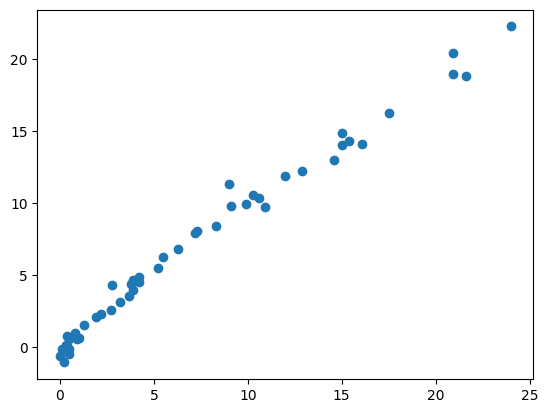

In [174]:
plt.scatter(y_test,y_pred_elastic_cv)

In [175]:
elastic_regressor_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': 24,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [178]:
elastic_regressor_cv.alpha_

0.045495701531503396

In [176]:
elastic_regressor_cv.coef_

array([ 0.        , -0.12047063,  0.12538475, -0.        , -0.55577247,
        3.71582124,  4.32856307,  0.14969935, -0.1439124 ,  0.2555993 ,
       -0.23824498])

In [177]:
evaluation_df.loc[len(evaluation_df.index)] = ["Elastic NetCV Model",mse_elastic_cv,mae_elastic_cv,rmse_elastic_cv,r2_elastic_cv,r2_elastic_cv]

In [179]:
evaluation_df

,MODEL,MSE,MAE,RMSE,R2,R2_ADJ
0,Linear Regression,0.683327,0.590878,0.826636,0.984783,0.983774
1,Lasso Model,2.457147,1.244030,1.567529,0.945282,0.941654
2,LassoCV Model,0.760746,0.612742,0.872208,0.983059,0.981936
3,Ridge Model,0.712705,0.607054,0.844219,0.984129,0.983077
4,RidgeCV Model,0.712705,0.607054,0.844219,0.984129,0.983077
5,RidgeCV Model with custom alpha set,0.802879,0.654481,0.896035,0.982121,0.980935
6,Elastic Net Model,5.081716,1.777925,2.254266,0.886836,0.886836
7,Elastic NetCV Model,0.863955,0.670165,0.929492,0.980761,0.980761


In [181]:
import pickle
pickle.dump(scaler,open('Algerian_fires_scaler.pkl','wb'))
pickle.dump(linear_regressor,open('Algerian_fires_linear.pkl','wb'))
pickle.dump(ridge_regessor_cv,open('Algerian_fires_ridgecv.pkl','wb'))